In [26]:
# from prediction_utils import get_galaxy_filename

# measured_path = [get_galaxy_filename('RI using kovats of Mass spectra from RAMClustR', '../data', ["enh", "pred"])]
# matched_path = [get_galaxy_filename('matchms output formatter _get-thresholded-data_', '../data')]
fi = "tmp/example mlp_1.msp"
# concs = ["all"]

# # if the predictions were generated in this galaxy session set to True
# is_fresh = False
# suffix = "" if is_fresh else ".txt"


# predictors = ["mlp_2_.3", "mlp_2_.1", "GPT2_5"]
# predictor= predictors[2]

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from matchms.importing import load_from_msp
from data_utils import spectrum_processing, get_n_samples
from helpers import get_mz_vector, get_his_size, compact_to_mz
from visual_utils import plot_spectrum_sample_prediction

import numpy as np
from matchms.filtering import normalize_intensities

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matchms.plotting import spectrum_plots

from collections import defaultdict
from matchms.plotting import plot_spectrum, plot_spectra_mirror
from matchms import Spectrum
from matchms.filtering import select_by_relative_intensity

import matplotlib

In [28]:
def get_spectra(path, normalize=True):
    # Load data from MSP file and apply filters
    spectrums = [*load_from_msp(path,  metadata_harmonization=False)]
    # Omit spectrums that didn't qualify for analysis
    if normalize:
        spectrums = [normalize_intensities(s) for s in spectrums if s is not None]
    
    spectrums =  [select_by_relative_intensity(s, intensity_from=0.00) for s in spectrums]
    return spectrums

In [29]:
specs = get_spectra(fi)

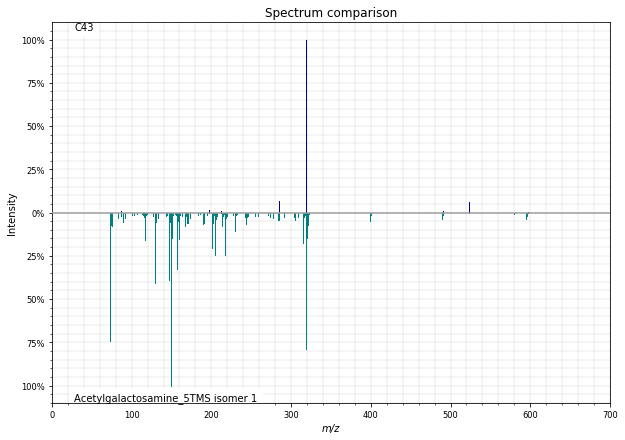

In [40]:
plt.figure(figsize=(10, 7))
plot_spectra_mirror(specs[0], specs[2])

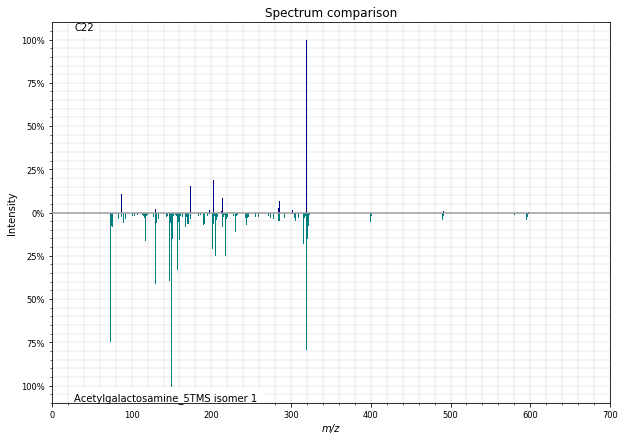

In [39]:
plt.figure(figsize=(10, 7))
plot_spectra_mirror(specs[1], specs[2])